In [1]:
import numpy as np
import pandas as pd

In [2]:
patient_data = pd.read_csv("Applied-Deep-Learning-with-Keras/Lesson06/data/Health_Data.csv")
patient_data.head(30)

,Patient_id,Age,Admission_type,PreExistingDisease,PreviousSurgery,Gender,Smoker,Homeless,DaysinHospital,Readmitted
0,1,33,Urgent,Y,0,M,1,0,1,0
1,2,34,Emergency,N,0,M,1,0,22,0
2,3,88,Trauma,Y,1,M,1,1,100,1
3,4,56,Elective,Y,0,M,1,0,2,0
4,5,45,Trauma,Y,0,M,1,0,34,0
5,6,23,Elective,N,0,M,0,0,123,0
6,7,67,Elective,N,0,M,0,0,23,0
7,8,55,Elective,N,0,M,1,0,123,1
8,9,77,Trauma,N,0,F,1,0,44,0
9,10,88,Emergency,N,0,M,1,0,3,1


In [3]:
patient_data.describe()

,Patient_id,Age,PreviousSurgery,Smoker,Homeless,DaysinHospital,Readmitted
count,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,179.00000,42.574230,0.341737,0.596639,0.378151,43.182073,0.193277
std,103.20126,29.274624,0.474957,0.491261,0.485606,47.362609,0.395423
min,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,90.00000,14.000000,0.000000,0.000000,0.000000,12.000000,0.000000
50%,179.00000,35.000000,0.000000,1.000000,0.000000,32.000000,0.000000
75%,268.00000,67.000000,1.000000,1.000000,1.000000,55.000000,0.000000
max,357.00000,96.000000,1.000000,1.000000,1.000000,352.000000,1.000000


In [4]:
patient_data.describe(include=['object'])

,Admission_type,PreExistingDisease,Gender
count,357,357,357
unique,5,2,2
top,Urgent,N,F
freq,131,228,186


In [5]:
patient_data.describe(include=['object'])

,Admission_type,PreExistingDisease,Gender
count,357,357,357
unique,5,2,2
top,Urgent,N,F
freq,131,228,186


In [6]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Colu

In [7]:
X = patient_data.iloc
X = patient_data.iloc[:, 1:9]
y = patient_data.iloc[:, 9]
print(y)
print(X)

0      0
1      0
2      1
3      0
4      0
      ..
352    0
353    0
354    0
355    0
356    0
Name: Readmitted, Length: 357, dtype: int64
     Age Admission_type PreExistingDisease  PreviousSurgery Gender  Smoker  \
0     33         Urgent                  Y                0      M       1   
1     34      Emergency                  N                0      M       1   
2     88         Trauma                  Y                1      M       1   
3     56       Elective                  Y                0      M       1   
4     45         Trauma                  Y                0      M       1   
..   ...            ...                ...              ...    ...     ...   
352   14         Trauma                  Y                1      M       1   
353   45         Trauma                  N                0      F       1   
354   67         Trauma                  N                1      M       1   
355   43         Trauma                  Y                1      M       0   

In [8]:
print(X.iloc[:, 1])

0         Urgent
1      Emergency
2         Trauma
3       Elective
4         Trauma
         ...    
352       Trauma
353       Trauma
354       Trauma
355       Trauma
356       Trauma
Name: Admission_type, Length: 357, dtype: object


In [9]:
SpecType = pd.get_dummies(X.iloc[:, 1], drop_first = True, prefix = 'SpecType')
preDie = pd.get_dummies(X.iloc[:, 2], drop_first = True, prefix = 'preDie')
X.drop(['Admission_type', 'PreExistingDisease', 'Gender'],axis = 1,inplace = True)

In [10]:
X = pd.concat([X, SpecType, preDie], axis = 1)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = X_test.columns)
X_train.head()

,Age,PreviousSurgery,Smoker,Homeless,DaysinHospital,SpecType_Emergency,SpecType_Newborn,SpecType_Trauma,SpecType_Urgent,preDie_Y
0,-0.631376,1.306339,0.853913,-0.745822,0.288742,-0.341456,-0.295527,1.946397,-0.785419,-0.758913
1,-1.204775,-0.765498,0.853913,1.340803,0.739842,-0.341456,-0.295527,-0.513770,1.273206,-0.758913
2,0.076941,-0.765498,-1.171080,-0.745822,0.675399,2.928638,-0.295527,-0.513770,-0.785419,-0.758913
3,1.561033,-0.765498,0.853913,1.340803,-0.849748,-0.341456,-0.295527,1.946397,-0.785419,-0.758913
4,1.662221,-0.765498,0.853913,1.340803,1.212423,-0.341456,-0.295527,1.946397,-0.785419,1.317674


In [13]:
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X_train.columns)
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
model = Sequential()
model.add(
    Dense(units = 6, activation = 'relu',kernel_initializer = 'uniform',input_dim = 10)
)
model.add(Dropout(rate = 0.3))
model.add(
    Dense(units = 6, activation = 'relu',kernel_initializer = 'uniform',)
)
model.add(Dropout(rate = 0.3))
model.add(
    Dense(units = 12, activation = 'tanh',kernel_initializer = 'uniform',)
)
model.add(Dropout(rate = 0.3))
model.add(
    Dense(units = 6, activation = 'tanh',kernel_initializer = 'uniform',)
)
model.add(Dropout(rate = 0.3))
model.add(
    Dense(units = 1, activation = 'sigmoid',kernel_initializer = 'uniform')
)
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(X_train_np, y_train_np, epochs = 400, batch_size = 20)

Epoch 1/400
13/13 [==============================] - 0s 798us/step - loss: 0.6912 - accuracy: 0.8032
Epoch 2/400
13/13 [==============================] - 0s 812us/step - loss: 0.6864 - accuracy: 0.8072
Epoch 3/400
13/13 [==============================] - 0s 870us/step - loss: 0.6800 - accuracy: 0.8072
Epoch 4/400
13/13 [==============================] - 0s 767us/step - loss: 0.6707 - accuracy: 0.8072
Epoch 5/400
13/13 [==============================] - 0s 845us/step - loss: 0.6574 - accuracy: 0.8072
Epoch 6/400
13/13 [==============================] - 0s 769us/step - loss: 0.6361 - accuracy: 0.8072
Epoch 7/400
13/13 [==============================] - 0s 846us/step - loss: 0.6042 - accuracy: 0.8072
Epoch 8/400
13/13 [==============================] - 0s 734us/step - loss: 0.5702 - accuracy: 0.8072
Epoch 9/400
13/13 [==============================] - 0s 767us/step - loss: 0.5338 - accuracy: 0.8072
Epoch 10/400
13/13 [==============================] - 0s 650us/step - loss: 0.5098 - accura

13/13 [==============================] - 0s 704us/step - loss: 0.2702 - accuracy: 0.9036
Epoch 82/400
13/13 [==============================] - 0s 846us/step - loss: 0.2680 - accuracy: 0.9036
Epoch 83/400
13/13 [==============================] - 0s 692us/step - loss: 0.2909 - accuracy: 0.8996
Epoch 84/400
13/13 [==============================] - 0s 741us/step - loss: 0.2675 - accuracy: 0.9197
Epoch 85/400
13/13 [==============================] - 0s 758us/step - loss: 0.2725 - accuracy: 0.8876
Epoch 86/400
13/13 [==============================] - 0s 767us/step - loss: 0.2813 - accuracy: 0.9076
Epoch 87/400
13/13 [==============================] - 0s 643us/step - loss: 0.2507 - accuracy: 0.9197
Epoch 88/400
13/13 [==============================] - 0s 765us/step - loss: 0.2607 - accuracy: 0.9157
Epoch 89/400
13/13 [==============================] - 0s 708us/step - loss: 0.2768 - accuracy: 0.9157
Epoch 90/400
13/13 [==============================] - 0s 607us/step - loss: 0.2376 - accuracy: 

13/13 [==============================] - 0s 734us/step - loss: 0.2585 - accuracy: 0.9277
Epoch 161/400
13/13 [==============================] - 0s 734us/step - loss: 0.2663 - accuracy: 0.9197
Epoch 162/400
13/13 [==============================] - 0s 778us/step - loss: 0.2753 - accuracy: 0.8996
Epoch 163/400
13/13 [==============================] - 0s 680us/step - loss: 0.2556 - accuracy: 0.9157
Epoch 164/400
13/13 [==============================] - 0s 604us/step - loss: 0.2635 - accuracy: 0.9116
Epoch 165/400
13/13 [==============================] - 0s 767us/step - loss: 0.2618 - accuracy: 0.9157
Epoch 166/400
13/13 [==============================] - 0s 765us/step - loss: 0.2773 - accuracy: 0.9036
Epoch 167/400
13/13 [==============================] - 0s 579us/step - loss: 0.2691 - accuracy: 0.9116
Epoch 168/400
13/13 [==============================] - 0s 759us/step - loss: 0.2849 - accuracy: 0.9036
Epoch 169/400
13/13 [==============================] - 0s 693us/step - loss: 0.2094 - a

13/13 [==============================] - 0s 735us/step - loss: 0.2959 - accuracy: 0.9116
Epoch 240/400
13/13 [==============================] - 0s 679us/step - loss: 0.2560 - accuracy: 0.9197
Epoch 241/400
13/13 [==============================] - 0s 690us/step - loss: 0.2337 - accuracy: 0.9116
Epoch 242/400
13/13 [==============================] - 0s 792us/step - loss: 0.2464 - accuracy: 0.9157
Epoch 243/400
13/13 [==============================] - 0s 751us/step - loss: 0.2716 - accuracy: 0.9116
Epoch 244/400
13/13 [==============================] - 0s 683us/step - loss: 0.2347 - accuracy: 0.9237
Epoch 245/400
13/13 [==============================] - 0s 784us/step - loss: 0.2495 - accuracy: 0.9076
Epoch 246/400
13/13 [==============================] - 0s 690us/step - loss: 0.2560 - accuracy: 0.9076
Epoch 247/400
13/13 [==============================] - 0s 687us/step - loss: 0.2514 - accuracy: 0.9076
Epoch 248/400
13/13 [==============================] - 0s 743us/step - loss: 0.2670 - a

13/13 [==============================] - 0s 752us/step - loss: 0.2295 - accuracy: 0.9237
Epoch 319/400
13/13 [==============================] - 0s 765us/step - loss: 0.2440 - accuracy: 0.9116
Epoch 320/400
13/13 [==============================] - 0s 650us/step - loss: 0.2766 - accuracy: 0.9116
Epoch 321/400
13/13 [==============================] - 0s 724us/step - loss: 0.2276 - accuracy: 0.9157
Epoch 322/400
13/13 [==============================] - 0s 844us/step - loss: 0.2542 - accuracy: 0.9237
Epoch 323/400
13/13 [==============================] - 0s 844us/step - loss: 0.2441 - accuracy: 0.9237
Epoch 324/400
13/13 [==============================] - 0s 628us/step - loss: 0.2587 - accuracy: 0.9157
Epoch 325/400
13/13 [==============================] - 0s 645us/step - loss: 0.2385 - accuracy: 0.9116
Epoch 326/400
13/13 [==============================] - 0s 767us/step - loss: 0.2679 - accuracy: 0.9036
Epoch 327/400
13/13 [==============================] - 0s 614us/step - loss: 0.2107 - a

13/13 [==============================] - 0s 725us/step - loss: 0.2555 - accuracy: 0.9357
Epoch 398/400
13/13 [==============================] - 0s 713us/step - loss: 0.2412 - accuracy: 0.9197
Epoch 399/400
13/13 [==============================] - 0s 736us/step - loss: 0.2324 - accuracy: 0.9157
Epoch 400/400
13/13 [==============================] - 0s 693us/step - loss: 0.2376 - accuracy: 0.9237


In [15]:
y_pred_class = model.predict(X_test_np)
y_pred_prob = model.predict_proba(X_test_np)
print(y_pred_class)
print(y_pred_prob)

Instructions for updating:
Please use `model.predict()` instead.
[[0.03011763]
 [0.91290164]
 [0.03008506]
 [0.03010494]
 [0.91458094]
 [0.03008503]
 [0.9144995 ]
 [0.03008533]
 [0.03008571]
 [0.03008541]
 [0.03008753]
 [0.034159  ]
 [0.03008503]
 [0.03009802]
 [0.03008509]
 [0.14726636]
 [0.03008503]
 [0.03008509]
 [0.05135328]
 [0.03008503]
 [0.03014362]
 [0.03008512]
 [0.03009725]
 [0.36033246]
 [0.03008527]
 [0.1017496 ]
 [0.03008521]
 [0.88907635]
 [0.03008503]
 [0.03008544]
 [0.0300858 ]
 [0.03396612]
 [0.03008503]
 [0.03011408]
 [0.03009781]
 [0.030193  ]
 [0.03013709]
 [0.03008574]
 [0.03012884]
 [0.90865797]
 [0.03008503]
 [0.03008512]
 [0.03008527]
 [0.03741461]
 [0.03008515]
 [0.03008509]
 [0.03008822]
 [0.03008547]
 [0.9132223 ]
 [0.03008515]
 [0.03008518]
 [0.3251868 ]
 [0.6811542 ]
 [0.03008509]
 [0.03008503]
 [0.91433376]
 [0.03008565]
 [0.03008515]
 [0.03008503]
 [0.03008866]
 [0.03078556]
 [0.19330513]
 [0.03008518]
 [0.03008518]
 [0.03047261]
 [0.03009006]
 [0.0300860

In [16]:
y_pred_class[:5]
y_pred_class = y_pred_class > 0.5
print(y_pred_class)

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
res = accuracy_score(y_test_np, y_pred_class)
y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [18]:
print(fpr)

[0.         0.01149425 0.01149425 0.02298851 0.02298851 0.03448276
 0.03448276 0.04597701 0.04597701 0.12643678 0.14942529 0.14942529
 0.16091954 0.16091954 0.22988506 0.22988506 0.25287356 0.25287356
 0.37931034 0.37931034 0.42528736 0.42528736 0.54022989 0.54022989
 0.57471264 0.59770115 0.63218391 0.65517241 0.68965517 0.72413793
 0.77011494 0.8045977  0.82758621 1.        ]


In [19]:
print(tpr)

[0.         0.         0.0952381  0.0952381  0.33333333 0.33333333
 0.38095238 0.38095238 0.42857143 0.47619048 0.47619048 0.52380952
 0.52380952 0.61904762 0.61904762 0.66666667 0.66666667 0.71428571
 0.71428571 0.76190476 0.76190476 0.80952381 0.80952381 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.9047619
 0.9047619  0.95238095 0.95238095 1.        ]


In [20]:
print(thresholds)

[1.914581   0.91458094 0.9144995  0.91433376 0.9002421  0.8955302
 0.88907635 0.87092155 0.6811542  0.36033246 0.19330513 0.14726636
 0.1017496  0.06390628 0.03091034 0.03078556 0.03043768 0.03026876
 0.03009781 0.03009725 0.03008866 0.03008825 0.03008553 0.03008547
 0.03008536 0.03008533 0.03008527 0.03008521 0.03008518 0.03008515
 0.03008512 0.03008509 0.03008506 0.03008503]


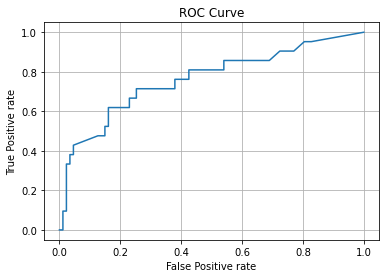

In [21]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.7613574165298302